In [73]:
import math
from matplotlib import pyplot as plt
import numpy as np

# **Zadanie 2.**

Najbardziej podstawowa metoda:

In [84]:
def find_abc1(n:int):
    k=0
    existance=False
    for a in range(n):
        k+=1
        for b in range(n):
            k+=1
            for c in range(n):
                k+=14
                if a**2+b**2==c**2 and a+b+c==n and a!=b and b!=c:
                    existance = True
                    return [existance,a,b,c,k]
    a,b,c=-1,-1,-1
    return [existance,a,b,c,k]

In [85]:
find_abc1(1000)

[True, 200, 375, 425, 2805456541]

In [86]:
find_abc1(12)

[True, 3, 4, 5, 6849]

In [87]:
find_abc1(11)

[False, -1, -1, -1, 18766]

Aby istniał trójkąt stworzony z długości a,b,c, muszą one spełniać warunek<br>
a+b>c => a+b+c=n => 2c<n => c<n/2<br>
zatem możemy zmienić zakres poszukiwań:

In [88]:
def find_abc2(n:int):
    k=0
    existance=False
    for a in range(round(n/2)+1):
        k+=1
        for b in range(round(n/2)+1):
            k+=1
            for c in range(round(n/2)+1):
                k+=14
                if a**2+b**2==c**2 and a+b+c==n and a!=b and b!=c:
                    existance = True
                    return [existance,a,b,c,k]
    a,b,c=-1,-1,-1
    return [existance,a,b,c,k]

In [89]:
find_abc2(1000)

[True, 200, 375, 425, 705539791]

In [93]:
find_abc2(12)

[True, 3, 4, 5, 2564]

In [94]:
find_abc2(11)

[False, -1, -1, -1, 4858]

Dodatkowo skoro liczby są całkowite, to wiemy, że muszą być różne, ponieważ jeśli a=b to c=a*sqrt(2) oraz możemy założyć, że a<b<c, więc możemy zmienić pętle:

In [95]:
def find_abc3(n:int):
    k=0
    existance=False
    for a in range(round(n/2)+1):
        k+=1
        for b in range(a+1,round(n/2)+1):
            k+=1
            for c in range(b+1,round(n/2)+1):
                k+=10
                if a**2+b**2==c**2 and a+b+c==n:
                    existance = True
                    return [existance,a,b,c,k]
    a,b,c=-1,-1,-1
    return [existance,a,b,c,k]

In [96]:
find_abc3(1000)

[True, 200, 375, 425, 163783726]

In [97]:
find_abc3(12)

[True, 3, 4, 5, 340]

In [98]:
find_abc3(11)

[False, -1, -1, -1, 378]

Jeśli zapiszemy c jako n-a-b to możemy uprościć pętle do dwóch w następujący sposób:

In [99]:
def find_abc4(n:int):
    k=0
    existance=False
    for a in range(round(n/2)+1):
        k+=1
        for b in range(a+1,round(n/2)+1):
            c=n-a-b
            k+=10
            if a**2+b**2==c**2 and b!=c:
                existance = True
                return [existance,a,b,c,k]
    a,b,c=-1,-1,-1
    return [existance,a,b,c,k]

In [100]:
find_abc4(1000)

[True, 200, 375, 425, 802951]

In [101]:
find_abc4(12)

[True, 3, 4, 5, 164]

In [102]:
find_abc4(11)

[False, -1, -1, -1, 217]

Przekształcając równania dane w zadaniu otrzymujemy:<br>
**a-b = -sqrt(c^2-n^2+2cn)<br>
b = (n-c-(a-b))/2<br>
a = n-c-b**<br>
przy 'a<b<c'<br>
jeszcze wiemy że a+b>c, czyli n-c>c, czyli n>2c, zatem c<n/2<br>
także 

In [103]:
def find_abc5(n:int):
    k=0
    existance=False
    for c in range(math.ceil(n*math.sqrt(2)-n),round(n/2)+1):
        ab_sub = math.sqrt(c**2-n**2+2*c*n)
        k+=9
        if math.floor(ab_sub) == ab_sub:
            b = int((n-c+ab_sub)/2)
            a = int(n-c-b)
            k+=8
            if a!=0 and b!=0:
                existance = True
                return [existance,a,b,c,k]
    a,b,c=-1,-1,-1
    return [existance,a,b,c,k]

In [107]:
find_abc5(1000)

[True, 200, 375, 425, 107]

In [108]:
find_abc5(12)

[True, 3, 4, 5, 17]

In [109]:
find_abc5(11)

[False, -1, -1, -1, 18]

In [110]:
x = range(1,6,1)
y = [find_abc1(1000)[4],find_abc2(1000)[4],find_abc3(1000)[4],find_abc4(1000)[4],find_abc5(1000)[4]]

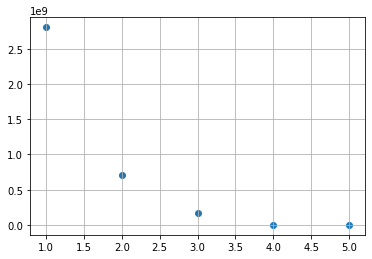

In [111]:
x = [i for i in range(1,6)]
plt.scatter(x,y)
plt.grid()

In [121]:
x = range(1,6)
y = [find_abc1(11)[4],find_abc2(11)[4],find_abc3(11)[4],find_abc4(11)[4],find_abc5(11)[4]]

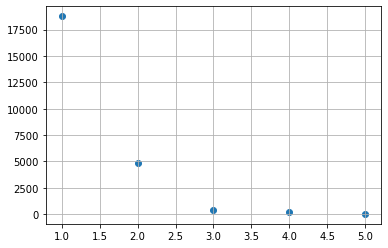

In [122]:
plt.scatter(x,y)
plt.grid()

In [123]:
y = [find_abc1(12)[4],find_abc2(12)[4],find_abc3(12)[4],find_abc4(12)[4],find_abc5(12)[4]]

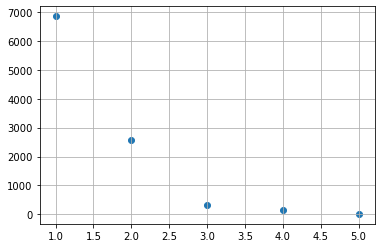

In [124]:
plt.scatter(x,y)
plt.grid()